In [ ]:
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [ ]:
import tensorflow as tf
import os
import numpy as np
import cv2


In [ ]:
data_dir = '/content/data/MyDrive/Indian'

In [ ]:
os.listdir(data_dir)

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 'A',
 'Z',
 'B',
 'C',
 'D',
 'E',
 'F',
 'Y',
 'X',
 'W',
 'G',
 'H',
 'M',
 'N',
 'V',
 'O',
 'U',
 'T',
 'S',
 'P',
 'R',
 'Q',
 'I',
 'J',
 'L',
 'K']

# Data Preprocessing


In [ ]:
import numpy as np
import cv2

minValue = 60

def func(path):
    frame = cv2.imread(path)


    # Convert to grayscale
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


    # Apply Gaussian blur
    blur = cv2.GaussianBlur(gray,(5,5),2)


    # Apply adaptive thresholding
    th3 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,2)

    # Apply global thresholding
    ret, res = cv2.threshold(th3, minValue, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


    return res



In [ ]:


if not os.path.exists("data2"):
    os.makedirs("data2")

path = data_dir  # Assuming data_dir is the path to your dataset
path1 = "data2"

for (dirpath, dirnames, filenames) in os.walk(path):
    for dirname in dirnames:
        print(dirname)
        for (direcpath, direcnames, files) in os.walk(path+"/"+dirname):
            if not os.path.exists(path1+"/"+dirname):
                os.makedirs(path1+"/"+dirname)
            for file in files:
                actual_path = path+"/"+dirname+"/"+file
                actual_path1 = path1+"/"+dirname+"/"+file
                img = cv2.imread(actual_path, 0)
                bw_image = func(actual_path)  # Assuming func is your preprocessing function
                cv2.imwrite(actual_path1, bw_image)

print("Preprocessing complete.")


1
2
3
4
5
6
7
8
9
A
Z
B
C
D
E
F
Y
X
W
G
H
M
N
V
O
U
T
S
P
R
Q
I
J
L
K
Preprocessing complete.


# Data visualization

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array

from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from matplotlib import pyplot as plt


In [ ]:
import pandas as pd

def load_images_to_dataframe(directory):
    data = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"):  # Filter for image files
                image_path = os.path.join(root, file)
                label = os.path.basename(root)  # Extract label from directory name
                image = cv2.imread(image_path)
                # Additional preprocessing or feature extraction can be performed here
                data.append({"image_path": image_path, "label": label})
    return pd.DataFrame(data)

In [ ]:
df = load_images_to_dataframe('data2')
print(df.tail())


             image_path label
42495  data2/V/1123.jpg     V
42496    data2/V/94.jpg     V
42497   data2/V/697.jpg     V
42498   data2/V/332.jpg     V
42499   data2/V/446.jpg     V


In [ ]:
print(df.head())

         image_path label
0   data2/M/750.jpg     M
1    data2/M/85.jpg     M
2  data2/M/1018.jpg     M
3   data2/M/208.jpg     M
4   data2/M/134.jpg     M


In [ ]:
#splitting the dataframe
X_Train,X_Test = train_test_split(df,train_size=0.9,random_state=123,shuffle=True)

In [ ]:
print(X_Train.shape)
print(X_Test.shape)

(38250, 2)
(4250, 2)


In [ ]:
print(type(X_Train))
print(type(X_Test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [ ]:
X_Train

,image_path,label
2281,data2/C/1068.jpg,C
22623,data2/Y/447.jpg,Y
19438,data2/G/156.jpg,G
28082,data2/P/5.jpg,P
15202,data2/3/799.jpg,3
...,...,...
7763,data2/J/190.jpg,J
15377,data2/3/380.jpg,3
17730,data2/1/143.jpg,1
28030,data2/P/270.jpg,P


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                        zoom_range=0.2,
                                        shear_range=0.2,
                                        brightness_range=[0.6,1.0],
                                        rotation_range=35,
                                        width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        vertical_flip=True,
                                         featurewise_std_normalization=False,
                                         samplewise_center=False,
                                         samplewise_std_normalization=False,
                                        fill_mode="nearest",
                                        validation_split=0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
def simple_vision(img_path):
    Picking_Img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)

    return Picking_Img

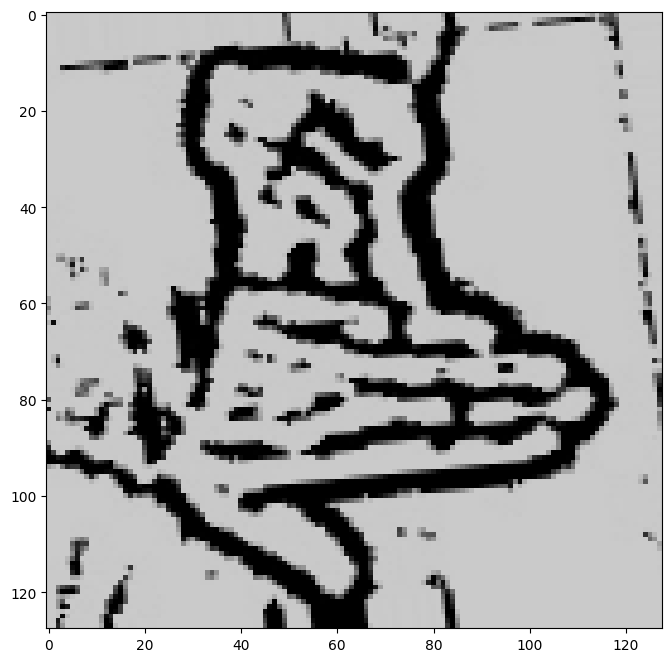

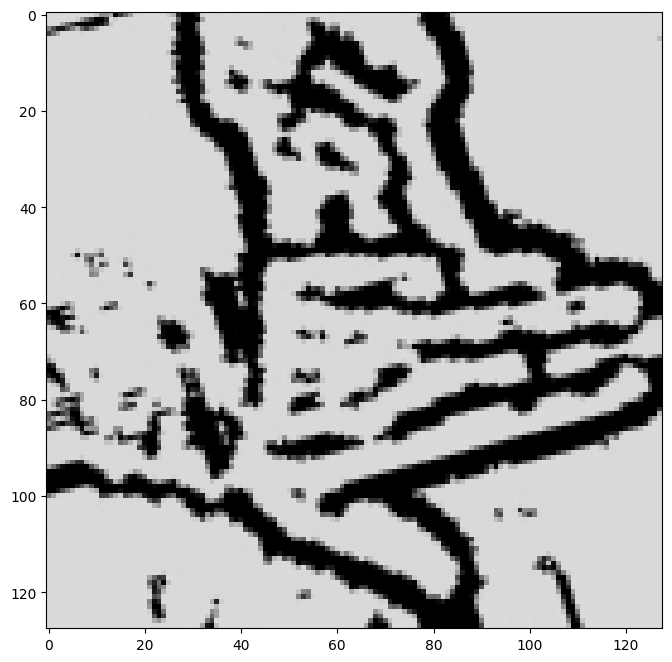

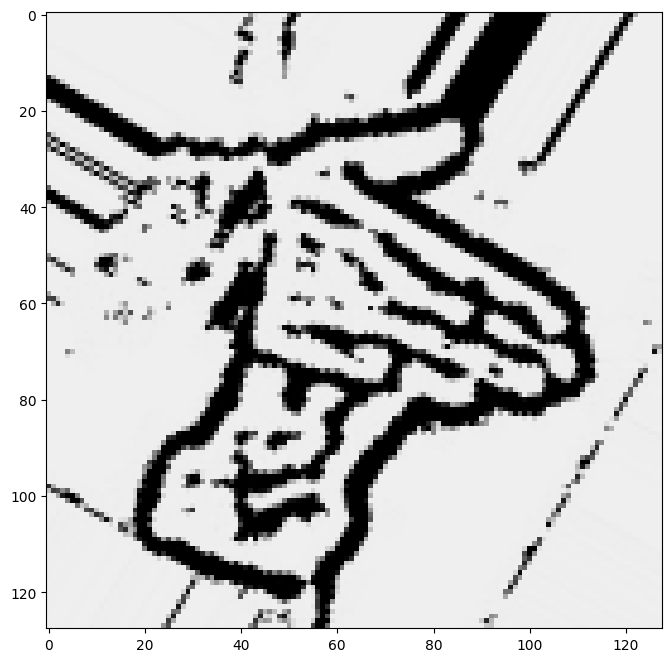

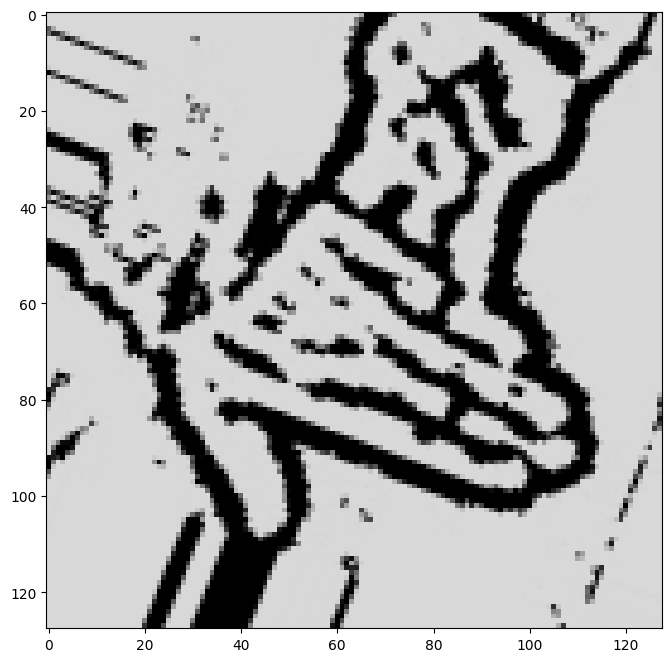

In [ ]:
Example_Img = simple_vision(X_Train.image_path[3])
Example_Img = Example_Img.reshape((1,) + Example_Img.shape)

i = 0

for batch in train_datagen.flow(Example_Img,batch_size=32):

    figure = plt.figure(figsize=(8,8))
    plt.imshow(image.img_to_array(batch[0]))

    i += 1
    if i % 4 == 0:
        break

plt.show()

In [ ]:
Train_Set = train_datagen.flow_from_dataframe(dataframe=X_Train,
                                                   batch_size=32,
                                                    x_col='image_path',
                                                    y_col='label',
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   subset="training",
                                                   target_size=(128, 128))

Found 34425 validated image filenames belonging to 35 classes.


In [ ]:
Validation_Set = train_datagen.flow_from_dataframe(dataframe=X_Train,
                                                   batch_size=32,
                                                    x_col='image_path',
                                                    y_col='label',
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   subset="validation",
                                                   target_size=(128,128))

Found 3825 validated image filenames belonging to 35 classes.


In [ ]:
Test_Set = test_datagen.flow_from_dataframe(dataframe=X_Test,
                                                   batch_size=32,
                                                    x_col='image_path',
                                                    y_col='label',
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   shuffle=False,
                                                   target_size=(128,128))

Found 4250 validated image filenames belonging to 35 classes.


In [ ]:
print("TRAIN: ")
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

TRAIN: 
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34}
[27, 10, 17, 27, 12]
(128, 128, 1)
------------------------------------------------------------
VALIDATION: 
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19, 'L': 20, 'M': 21, 'N': 22, 'O': 23, 'P': 24, 'Q': 25, 'R': 26, 'S': 27, 'T': 28, 'U': 29, 'V': 30, 'W': 31, 'X': 32, 'Y': 33, 'Z': 34}
[11, 33, 15, 24, 2]
(128, 128, 1)
------------------------------------------------------------
TEST: 
{'1': 0, '2': 1, '3': 2, '4': 3, '5': 4, '6': 5, '7': 6, '8': 7, '9': 8, 'A': 9, 'B': 10, 'C': 11, 'D': 12, 'E': 13, 'F': 14, 'G': 15, 'H': 16, 'I': 17, 'J': 18, 'K': 19

# Model


In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras.optimizers import Adam

In [ ]:
COMPILE_OPTIMIZER = "adam"
COMPILE_LOSS = "categorical_crossentropy"
COMPILE_METRICS = ["accuracy"]
INPUT_DIM = (128,128,1)
OUTPUT_DIM = 35

In [ ]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

In [ ]:
Model = Sequential()

Model.add(Conv2D(16,(3,3),activation="relu",input_shape=INPUT_DIM))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(32,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Flatten())

Model.add(Dense(1000,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(100,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(OUTPUT_DIM,activation="softmax"))

In [ ]:
Model.compile(optimizer=COMPILE_OPTIMIZER,loss=COMPILE_LOSS,metrics=COMPILE_METRICS)

In [ ]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      160       
                                                                 
 batch_normalization (Batch  (None, 126, 126, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 63, 63, 32)        4640      
                                                                 
 dropout (Dropout)           (None, 63, 63, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 31, 31, 32)        0

In [ ]:
CNN_Model = Model.fit(Train_Set,
                      validation_data=Validation_Set,
                      callbacks=[Early_Stopper,Checkpoint_Model],
                      epochs=20)

Epoch 1/20
1076/1076 [==============================] - 107s 92ms/step - loss: 2.1551 - accuracy: 0.3679 - val_loss: 0.5824 - val_accuracy: 0.9072
Epoch 2/20
1076/1076 [==============================] - 96s 89ms/step - loss: 0.4981 - accuracy: 0.8403 - val_loss: 0.1903 - val_accuracy: 0.9744
Epoch 3/20
1076/1076 [==============================] - 96s 89ms/step - loss: 0.2641 - accuracy: 0.9182 - val_loss: 0.0779 - val_accuracy: 0.9922
Epoch 4/20
1076/1076 [==============================] - 96s 89ms/step - loss: 0.1935 - accuracy: 0.9396 - val_loss: 0.1007 - val_accuracy: 0.9801
Epoch 5/20
1076/1076 [==============================] - 96s 89ms/step - loss: 0.1585 - accuracy: 0.9517 - val_loss: 0.0638 - val_accuracy: 0.9882
Epoch 6/20
1076/1076 [==============================] - 98s 91ms/step - loss: 0.1285 - accuracy: 0.9614 - val_loss: 0.0538 - val_accuracy: 0.9908
Epoch 7/20
1076/1076 [==============================] - 96s 89ms/step - loss: 0.1185 - accuracy: 0.9652 - val_loss: 1.6016 

# Saving Model


In [ ]:
!pip install h5py
import h5py

In [ ]:
Model.save("Prediction_CNN_Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_json = Model.to_json()
with open("model-bw.json", "w") as json_file:
  json_file.write(model_json)
print('Model Saved.')
Model.save_weights('model-bw.h5')
print('Weights Saved..')

Model Saved.
Weights Saved..


<Axes: >

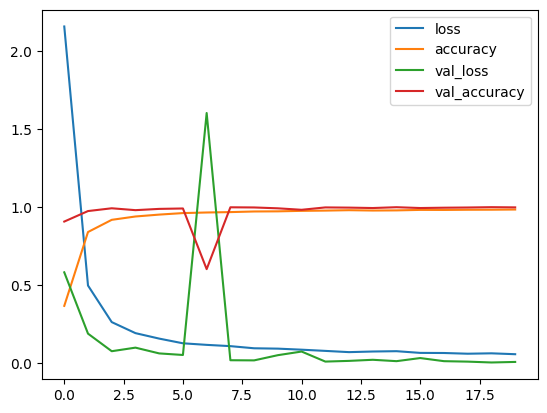

In [ ]:
Grap_Data = pd.DataFrame(CNN_Model.history)
Grap_Data.plot()

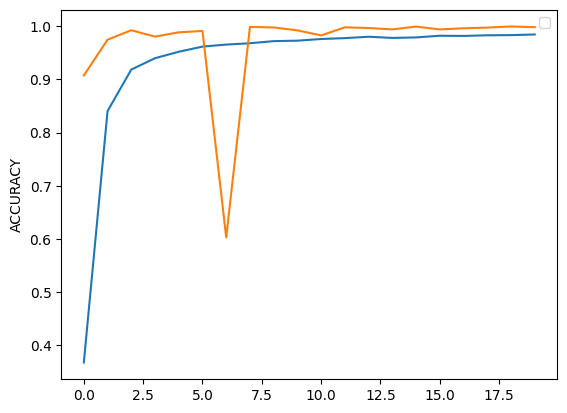

In [ ]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

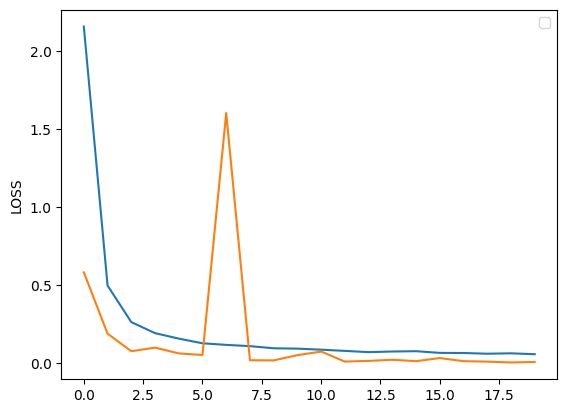

In [ ]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [ ]:
Model_Results = Model.evaluate(Test_Set)
print("LOSS" + "%.4f" % Model_Results[0])
print("ACCURACY" + "%.4f" % Model_Results[1])


133/133 [==============================] - 3s 21ms/step - loss: 0.0088 - accuracy: 0.9969
LOSS0.0088
ACCURACY0.9969


In [ ]:
Model_Test_Prediction = Model.predict(Test_Set)
Model_Test_Prediction = Model_Test_Prediction.argmax(axis= -1)

133/133 [==============================] - 3s 18ms/step


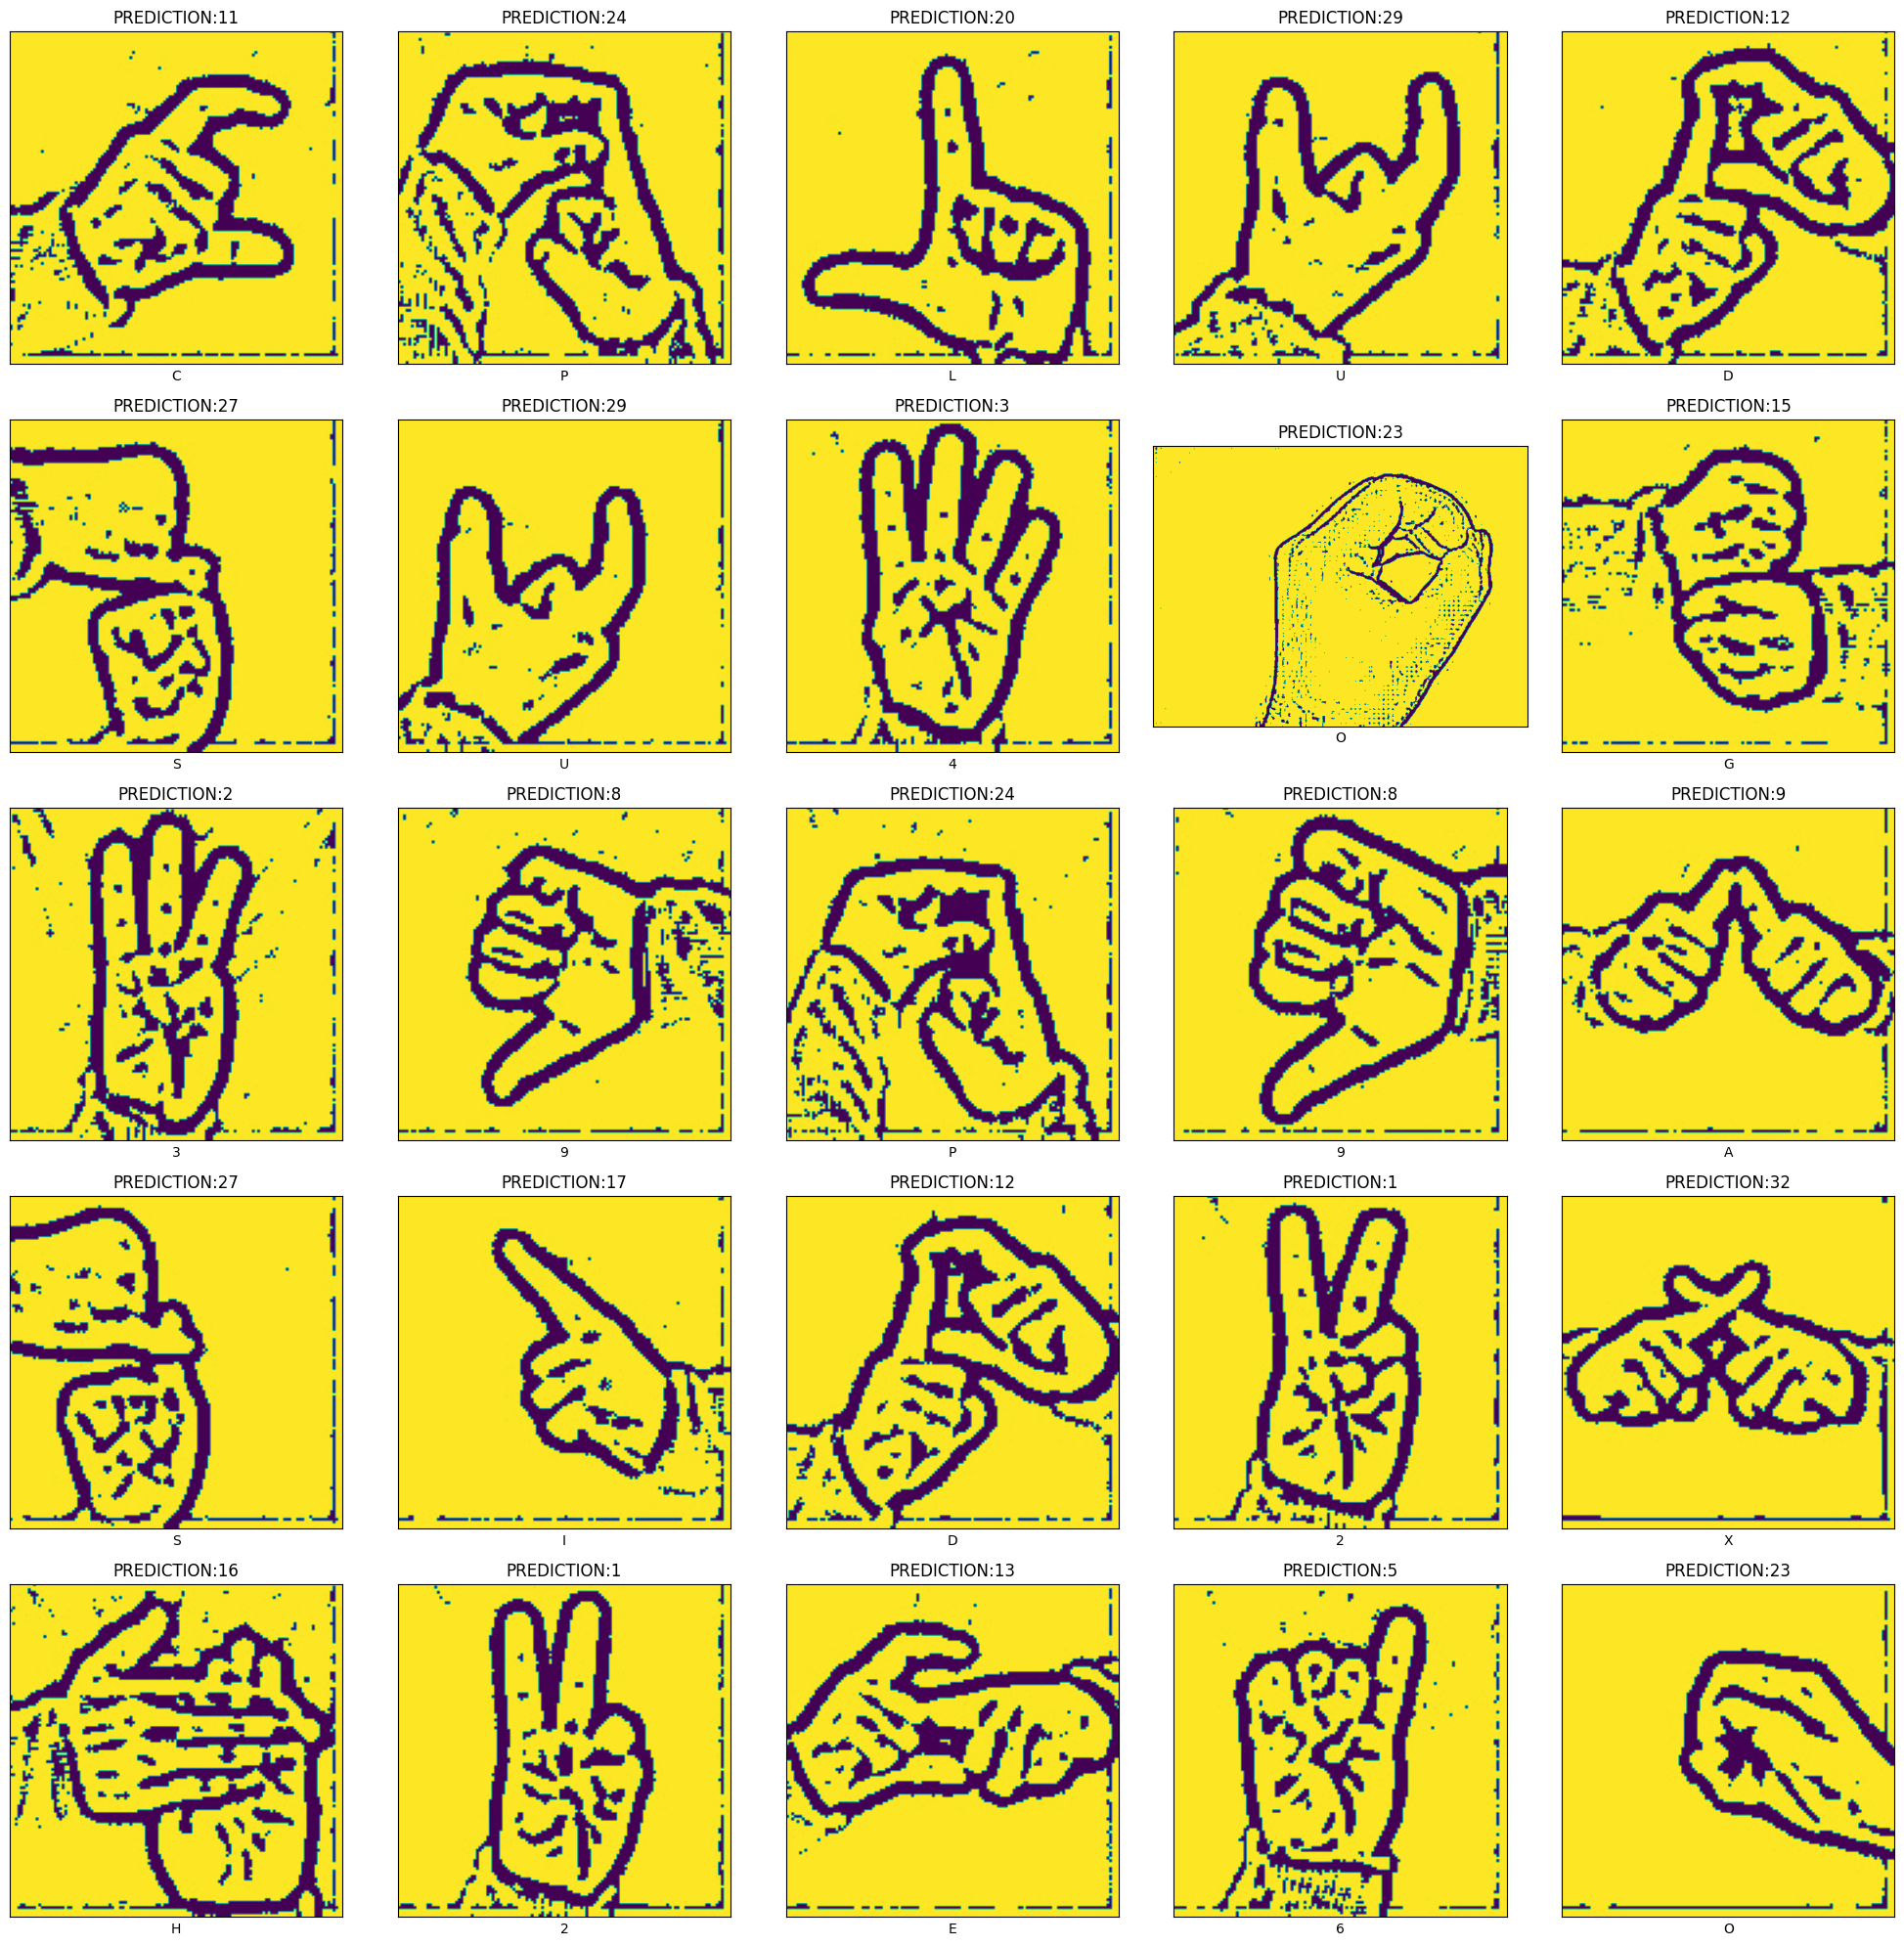

In [39]:
fig, axes = plt.subplots(nrows=5,
                         ncols=5,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(X_Test["image_path"].iloc[i]))
    ax.set_title(f"PREDICTION:{Model_Test_Prediction[i]}")
    ax.set_xlabel(X_Test["label"].iloc[i])
plt.tight_layout()
plt.show()

In [40]:
import pickle

In [41]:
with open('mode_pkl', 'wb') as files:
  pickle.dump(Model, files)